# Import data

In [19]:
import tensorflow as tf

In [20]:
!wget --no-check-certificate \
  https://github.com/ahmadlaiq97/wildanimal/archive/refs/heads/main.zip \
  -O /tmp/wildanimal.zip

--2022-06-15 22:33:46--  https://github.com/ahmadlaiq97/wildanimal/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/ahmadlaiq97/wildanimal/zip/refs/heads/main [following]
--2022-06-15 22:33:46--  https://codeload.github.com/ahmadlaiq97/wildanimal/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.113.9
Connecting to codeload.github.com (codeload.github.com)|140.82.113.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘/tmp/wildanimal.zip’

/tmp/wildanimal.zip     [  <=>               ] 869.62M  24.4MB/s    in 36s     

2022-06-15 22:34:22 (24.4 MB/s) - ‘/tmp/wildanimal.zip’ saved [911867912]



In [21]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/wildanimal.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp'
train_dir = os.path.join(base_dir, 'wildanimal-main/train')
validation_dir = os.path.join(base_dir, 'wildanimal-main/val')

In [22]:
# Directory with our training dandelion pictures
train_no = os.path.join('/tmp/wildanimal-main/train/no')

# Directory with our training grass pictures
train_wild = os.path.join('/tmp/wildanimal-main/train/wild')

# Directory with our validation dandelion pictures
valid_no = os.path.join('/tmp/wildanimal-main/val/no')

# Directory with our validation grass pictures
valid_wild = os.path.join('/tmp/wildanimal-main/val/wild')

In [23]:
train_no_names = os.listdir(train_no)
print(train_no_names[:10])

train_wild_names = os.listdir(train_wild)
print(train_wild_names[:10])

validation_no_names = os.listdir(valid_no)
print(validation_no_names[:10])

validation_wild_names = os.listdir(valid_wild)
print(validation_wild_names[:10])

['6aac1c6aa7fc2d23 - Copy.jpg', '3b6819e309d6459c - Copy.jpg', '9b86cb4b4cfbd7d1 - Copy.jpg', '9ace2b1e0af4cad0.jpg', '1431422309330f42.jpg', '895dbfa06f80d04b - Copy.jpg', 'b4bbb0930718fe3d - Copy.jpg', '4f4047f49a19c6c3.jpg', '65e90844cfd3f66f.jpg', '9fd4faad2c43ca9a.jpg']
['d1cee07bd106c72b.jpg', '2fc33f14c91f74d7 - Copy.jpg', '03bacd7be83b721e.jpg', '136a7c94de7c61dd.jpg', '1dfc09c5ba442f0c - Copy.jpg', 'bear13 - Copy.jpg', 'bear18 - Copy.jpg', '760931f98b3d9f5e - Copy.jpg', '1728d27e56111e6a.jpg', '719d511b89435268 - Copy.jpg']
['df69d522542e1357.jpg', 'f6ae019541b9d03f - Copy.jpg', 'f3cb2620040852c4 - Copy.jpg', 'c577364ab687f22d - Copy.jpg', 'ccb7116e7141f189.jpg', 'b1416101ba3f1ec5 - Copy.jpg', 'f77cb9608197b6b3 - Copy.jpg', 'db435eb6d22291ce - Copy.jpg', 'e4f3c6e01c8e79df.jpg', 'c966cb21efa54558.jpg']
['f94496623ca173a5.jpg', 'f8026ea33c54be8b - Copy.jpg', 'e75cd5309c0812bf - Copy.jpg', 'd171d3933cf5d39d - Copy.jpg', 'j6.jpg', 'dfc70cafaa140e4f - Copy.jpg', 'j17.jpg', 'f084cbb

In [24]:
print('total training no images:', len(os.listdir(train_no)))
print('total training wild images:', len(os.listdir(train_wild)))
print('total validation no images:', len(os.listdir(valid_no)))
print('total validation wild images:', len(os.listdir(valid_wild)))

total training no images: 900
total training wild images: 900
total validation no images: 330
total validation wild images: 224


# Preprocessing

In [25]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

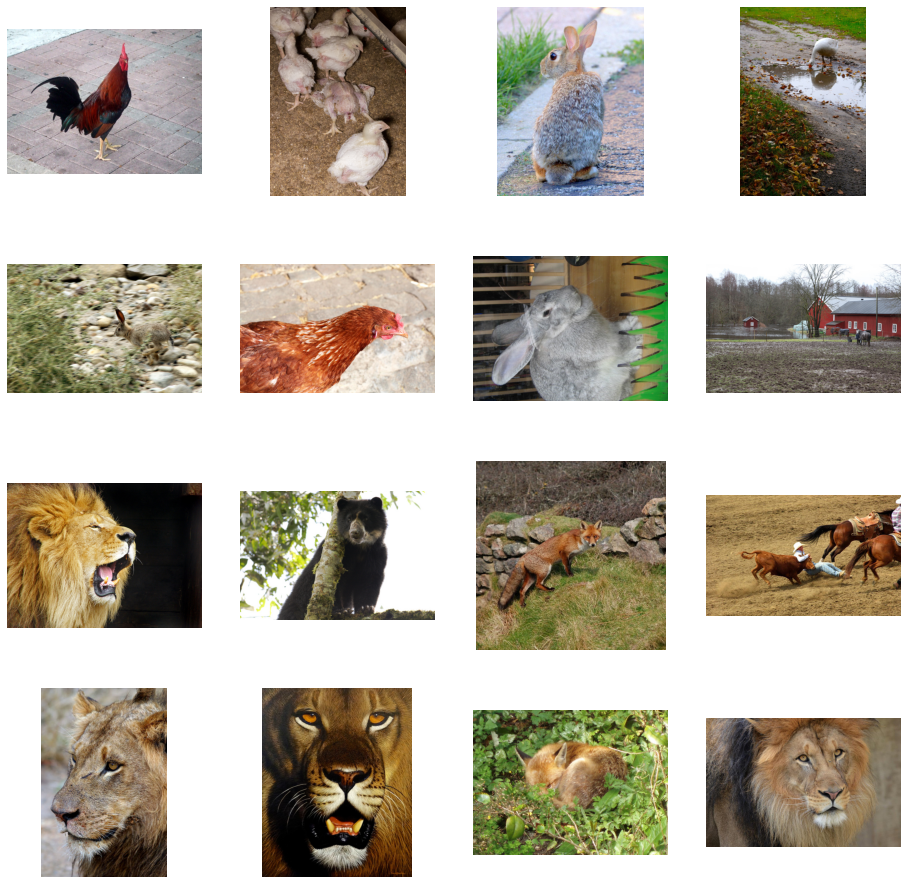

In [34]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_no_pic = [os.path.join(train_no, fname) 
                for fname in train_no_names[pic_index-8:pic_index]]
next_wild_pic = [os.path.join(train_wild, fname) 
                for fname in train_wild_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_no_pic + next_wild_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 120 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/wildanimal-main/train/',  # This is the source directory for training images
        classes = ['no', 'wild'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=120,
        # Use binary labels
        class_mode='binary')

# Flow validation images in batches of 19 using valid_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/wildanimal-main/val/',  # This is the source directory for training images
        classes = ['no', 'wild'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=19,
        # Use binary labels
        class_mode='binary',
        shuffle=False
)

Found 1800 images belonging to 2 classes.
Found 554 images belonging to 2 classes.


# Modelling

In [36]:
import tensorflow as tf
import numpy as np
from itertools import cycle

from sklearn import svm,datasets
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [38]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (5, 5), strides=(2,2),
                                                            activation='relu',padding='same',
                                                            input_shape = (200,200,3),
                                                            kernel_initializer='he_normal',
                                                            bias_initializer='zeros'),
                                    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                                    tf.keras.layers.Conv2D(64, (3, 3), strides=(2,2),
                                                            activation='relu',padding='same',
                                                            input_shape = (200,200,3),
                                                            kernel_initializer='he_normal',
                                                            bias_initializer='zeros'),
                                    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                                    #tf.keras.layers.Conv2D(64, (3, 3), strides=(2,2),
                                    #                        activation='relu',padding='same',
                                    #                        input_shape = (200,200,3),
                                    #                        kernel_initializer='he_normal',
                                    #                        bias_initializer='zeros'),
                                    #tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(128,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1,activation=tf.nn.sigmoid),])

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1

# Training

In [40]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [41]:
history = model.fit(train_generator,
                    steps_per_epoch=4,
                    epochs=15,
                    verbose=1,
                    validation_data=train_generator,
                    validation_steps=4)

Epoch 1/15
4/4 [==============================] - 30s 8s/step - loss: 0.9321 - accuracy: 0.5125 - val_loss: 0.6903 - val_accuracy: 0.5333
Epoch 2/15
4/4 [==============================] - 27s 7s/step - loss: 0.7206 - accuracy: 0.5083 - val_loss: 0.6830 - val_accuracy: 0.5771
Epoch 3/15
4/4 [==============================] - 26s 7s/step - loss: 0.6924 - accuracy: 0.5125 - val_loss: 0.6766 - val_accuracy: 0.5542
Epoch 4/15
4/4 [==============================] - 33s 10s/step - loss: 0.6805 - accuracy: 0.5562 - val_loss: 0.6667 - val_accuracy: 0.5813
Epoch 5/15
4/4 [==============================] - 34s 10s/step - loss: 0.6592 - accuracy: 0.6229 - val_loss: 0.6437 - val_accuracy: 0.6729
Epoch 6/15
4/4 [==============================] - 34s 10s/step - loss: 0.6436 - accuracy: 0.6500 - val_loss: 0.6075 - val_accuracy: 0.6938
Epoch 7/15
4/4 [==============================] - 26s 7s/step - loss: 0.6013 - accuracy: 0.6917 - val_loss: 0.5676 - val_accuracy: 0.7312
Epoch 8/15
4/4 [===============

In [43]:
model.evaluate(validation_generator)

30/30 [==============================] - 11s 370ms/step - loss: 0.6011 - accuracy: 0.6715


[0.6011058688163757, 0.671480119228363]

In [44]:
STEP_SIZE_TEST=train_generator.n//train_generator.batch_size
train_generator.reset()
preds = model.predict(train_generator,verbose=1)

15/15 [==============================] - 38s 2s/step


# Prediksi

In [45]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(200, 200))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]<0.5:
    print(fn + " hewan tidak buas ")
  else:
    print(fn + " hewan buas ")
 

Saving 03bacd7be83b721e.jpg to 03bacd7be83b721e.jpg
[1.]
03bacd7be83b721e.jpg hewan buas 


In [46]:
#install package h5py
!pip install h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
#simpan model
model.save('/tmp/model_wildanimal.h5')